## UCell performance upon addition of genes with max rank to gene expression signature
The following experiment show the behaviour of UCell scores upon addition of genes into the signature that fall into the uninformative tail of UCell, i.e., that have a rank larger than max rank of 1500.
The experiment starts with ideal signature of different lengths, i.e., different sequences of the smallest ranks. Iteratively max ranks are included to the signature.
The formulation of the UCell score computation is rom the original paper by [Andretta and Carmona](https://doi.org/10.1016/j.csbj.2021.06.043).

In [51]:
import numpy as np 
import os 
import sys

sys.path.append('../..')
from data.constants import BASE_PATH_EXPERIMENTS

In [95]:
sig_lengths = []
a = [10,50,100,500,1000]
for i in a:
    sig_lengths.append(np.arange(1,i+1))

In [96]:
rank_sums = []
u_stats = []

In [97]:
for sig_length in sig_lengths:
    rank_sum = []
    u_stat = []
    for i in range(0,(1500-len(sig_length))):
        curr_rank_sum = np.sum(sig_length) + i*1500
        rank_sum.append(curr_rank_sum)
        curr_sig_len = i+len(sig_length)
        curr_u_stat = 1-(curr_rank_sum -((curr_sig_len*(curr_sig_len+1))/2))/(1500*curr_sig_len)
        u_stat.append(curr_u_stat)
    rank_sums.append(rank_sum)
    u_stats.append(u_stat)

In [98]:
import matplotlib.pyplot as plt

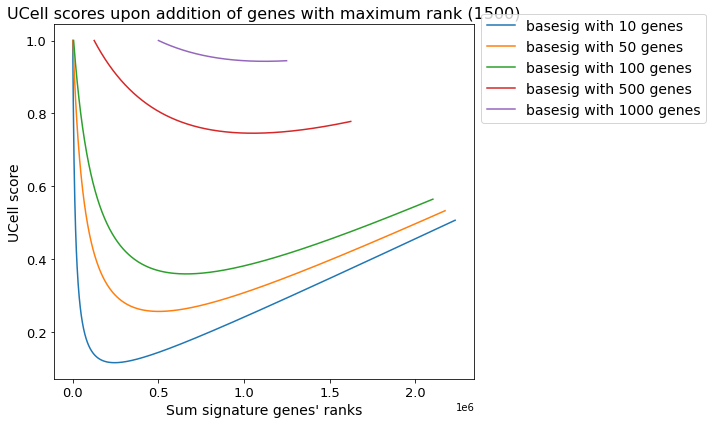

In [104]:
plt.figure(figsize=(10,6))
for i in range(5):
    plt.plot(rank_sums[i], u_stats[i], label=f'basesig with {a[i]} genes')
plt.xlabel('Sum signature genes\' ranks', fontsize=14)
plt.xticks(fontsize=13)
plt.ylabel('UCell score',fontsize=14)
plt.yticks(fontsize=13)
plt.title('UCell scores upon addition of genes with maximum rank (1500)', fontsize=16)
plt.legend(fontsize=14,bbox_to_anchor=(1, 1.05))
plt.tight_layout()
plt.savefig(os.path.join(BASE_PATH_EXPERIMENTS, 'stability_analysis/UCell_theroretical_experiment.png'),format='png', dpi=300)
plt.savefig(os.path.join(BASE_PATH_EXPERIMENTS, 'stability_analysis/UCell_theroretical_experiment.svg'),format='svg')